# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime as dt
from scipy.stats import linregress

import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

e5290281698f633e643203bf15f67dd7


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

today = str(date.today())

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | galveston
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bowen
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | huambo
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | argo
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | nagqu
Processing Record 14 of Set 1 | iza
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | es castell
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | loik

Processing Record 37 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 38 of Set 4 | afaahiti
Processing Record 39 of Set 4 | tulun
Processing Record 40 of Set 4 | badger
Processing Record 41 of Set 4 | susuman
Processing Record 42 of Set 4 | fuerte olimpo
Processing Record 43 of Set 4 | san luis de la loma
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | yuzhno-kurilsk
Processing Record 46 of Set 4 | happy valley-goose bay
Processing Record 47 of Set 4 | borovskoy
Processing Record 48 of Set 4 | rancho palos verdes
Processing Record 49 of Set 4 | margaret river
Processing Record 0 of Set 5 | sisimiut
Processing Record 1 of Set 5 | warren
Processing Record 2 of Set 5 | illizi
Processing Record 3 of Set 5 | sorochinsk
Processing Record 4 of Set 5 | sile
Processing Record 5 of Set 5 | awjilah
Processing Record 6 of Set 5 | nagyatad
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | hayma'
City not found. Skipping...
Pro

Processing Record 29 of Set 8 | kavarna
Processing Record 30 of Set 8 | iglas
Processing Record 31 of Set 8 | zouerate
Processing Record 32 of Set 8 | chibougamau
Processing Record 33 of Set 8 | mchinji
Processing Record 34 of Set 8 | christchurch
Processing Record 35 of Set 8 | mazara del vallo
Processing Record 36 of Set 8 | dokkum
Processing Record 37 of Set 8 | luwuk
Processing Record 38 of Set 8 | jolo
Processing Record 39 of Set 8 | vilyuysk
Processing Record 40 of Set 8 | lae
Processing Record 41 of Set 8 | lake havasu city
Processing Record 42 of Set 8 | verkhniy baskunchak
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | prince george
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | novokubansk
Processing Record 48 of Set 8 | ghanzi
Processing Record 49 of Set 8 | singkil
Processing Record 0 of Set 9 | lake los angeles
Processing Record 1 of Set 9 | queenstown
Processing Record 2 of

Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | rio san juan
Processing Record 20 of Set 12 | villa ojo de agua
Processing Record 21 of Set 12 | mermoz boabab
Processing Record 22 of Set 12 | borzya
Processing Record 23 of Set 12 | nguigmi
Processing Record 24 of Set 12 | onguday
Processing Record 25 of Set 12 | churapcha
Processing Record 26 of Set 12 | macau
Processing Record 27 of Set 12 | sur
Processing Record 28 of Set 12 | brookings
Processing Record 29 of Set 12 | novaya igirma
Processing Record 30 of Set 12 | smithers
Processing Record 31 of Set 12 | cururupu
Processing Record 32 of Set 12 | lubumbashi
Processing Record 33 of Set 12 | dauphin
Processing Record 34 of Set 12 | miri
Processing Record 35 of Set 12 | narvik
Processing Record 36 of Set 12 | mejit
Processing Record 37 of Set 12 | aguie
Processing Record 38 of Set 12 | genteng
Processing Record 39 of Set 12 | katsuura
Processing Record 40 of Set 12 | leua
Processing Record 41 of Set 12 | pokha

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,galveston,29.3669,-94.9669,26.05,74,0,6.69,US,1682447492
1,udachny,66.4167,112.4000,-8.52,95,100,3.39,RU,1682447802
2,ushuaia,-54.8000,-68.3000,7.81,57,40,4.12,AR,1682447524
3,bowen,-20.0167,148.2333,21.66,82,95,6.13,AU,1682447803
4,port-aux-francais,-49.3500,70.2167,4.36,79,11,11.48,TF,1682447803


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,galveston,29.3669,-94.9669,26.05,74,0,6.69,US,1682447492
1,udachny,66.4167,112.4000,-8.52,95,100,3.39,RU,1682447802
2,ushuaia,-54.8000,-68.3000,7.81,57,40,4.12,AR,1682447524
3,bowen,-20.0167,148.2333,21.66,82,95,6.13,AU,1682447803
4,port-aux-francais,-49.3500,70.2167,4.36,79,11,11.48,TF,1682447803


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

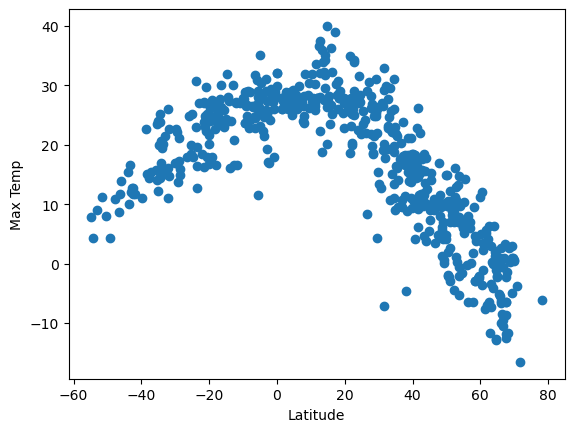

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'] )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
#plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

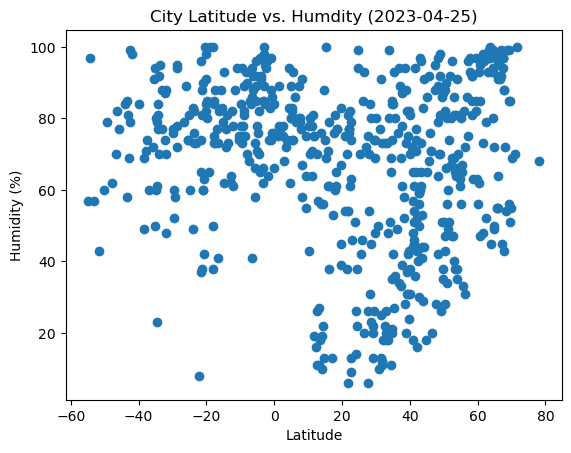

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'] )

# Incorporate the other graph properties
plt.title('City Latitude vs. Humdity ('+dt.fromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
#plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE